## **Configuracion de entorno**

In [2]:
#%run /content/configuracion_BitCoin_Eli.ipynb
%cd /content/drive/MyDrive/Test/monografia_UDEA/Codigo/
%run configuracion_entorno.ipynb
#%ls

/content/drive/MyDrive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Test
Archive:  DataSet.zip


fatal: destination path 'monografia_UDEA' already exists and is not an empty directory.
replace coin_Tether.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:  NULL
(EOF or read error, treating as "[N]one" ...)


## **Carga de archivo fuentes**

Se realiza el proceso de carga de los archivos correspondiente a cada moneda de análisis

**Análisis de la miníma fecha de cada móneda**

Se realiza con el objetivo de poder tomar una fecha de corte simmilar para todas las monedas y facilitar el analisis en la misma ventana de tiempo

In [4]:
print("Miníma Fecha del bitcoin", bitcoin.Date.min())
print("Miníma Fecha del binance", binance.Date.min())
print("Miníma Fecha del cardano", cardano.Date.min())
print("Miníma Fecha del ethereum", ethereum.Date.min())
print("Miníma Fecha del tether", tether.Date.min())

Miníma Fecha del bitcoin 2013-04-29 23:59:59
Miníma Fecha del binance 2017-07-26 23:59:59
Miníma Fecha del cardano 2017-10-02 23:59:59
Miníma Fecha del ethereum 2015-08-08 23:59:59
Miníma Fecha del tether 2015-02-26 23:59:59


In [5]:
bitcoin.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [ ]:
bitcoin.Date.max()

'2021-07-06 23:59:59'

Se crea un dataframe vació con las columnas necesarias

In [ ]:
df_Coins_open = df = pd.DataFrame(columns=['bitcoinOpen', 'binanceOpen', 'cardanoOpen','ethereumOpen','tetherOpen'])

Se inicializan los campos del nuevo dataframe con los valores correspondientes

In [ ]:
df_Coins_open['bitcoinOpen'] = bitcoin.Open[bitcoin.Date >= '2017-10-02 23:59:59'].values
df_Coins_open['binanceOpen'] = binance.Open[binance.Date >= '2017-10-02 23:59:59'].values
df_Coins_open['cardanoOpen'] = cardano.Open[cardano.Date >= '2017-10-02 23:59:59'].values
df_Coins_open['ethereumOpen'] = ethereum.Open[ethereum.Date >= '2017-10-02 23:59:59'].values
df_Coins_open['tetherOpen'] = tether.Open[tether.Date >= '2017-10-02 23:59:59'].values

#Se agrega la fecha 
df_Coins_open['Date'] = pd.to_datetime(cardano['Date']).values

Se formatean los datos como tipo date y se indexa la fecha

In [ ]:
df_Coins_open['Date'] = df_Coins_open['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
df_Coins_open.set_index("Date", inplace=True)

In [ ]:
df_Coins_open.head()

,bitcoinOpen,binanceOpen,cardanoOpen,ethereumOpen,tetherOpen
Date,,,,,
2017-10-02,4395.810059,1.52662,0.024607,302.481995,0.998088
2017-10-03,4408.459961,1.96783,0.025757,297.483002,1.001880
2017-10-04,4319.370117,1.85150,0.020864,292.753998,1.001910
2017-10-05,4229.879883,1.63499,0.021951,292.773010,1.000270
2017-10-06,4324.459961,1.67731,0.021359,295.154999,1.000420


Se toma la información relevante del dataframe que contiene los precios de apertura de cada moneda

In [ ]:
df_Coins_open.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1374 entries, 2017-10-02 to 2021-07-06
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bitcoinOpen   1374 non-null   float64
 1   binanceOpen   1374 non-null   float64
 2   cardanoOpen   1374 non-null   float64
 3   ethereumOpen  1374 non-null   float64
 4   tetherOpen    1374 non-null   float64
dtypes: float64(5)
memory usage: 64.4+ KB


## **Visualización Series de Tiempo monedas**

**Bitcoin**

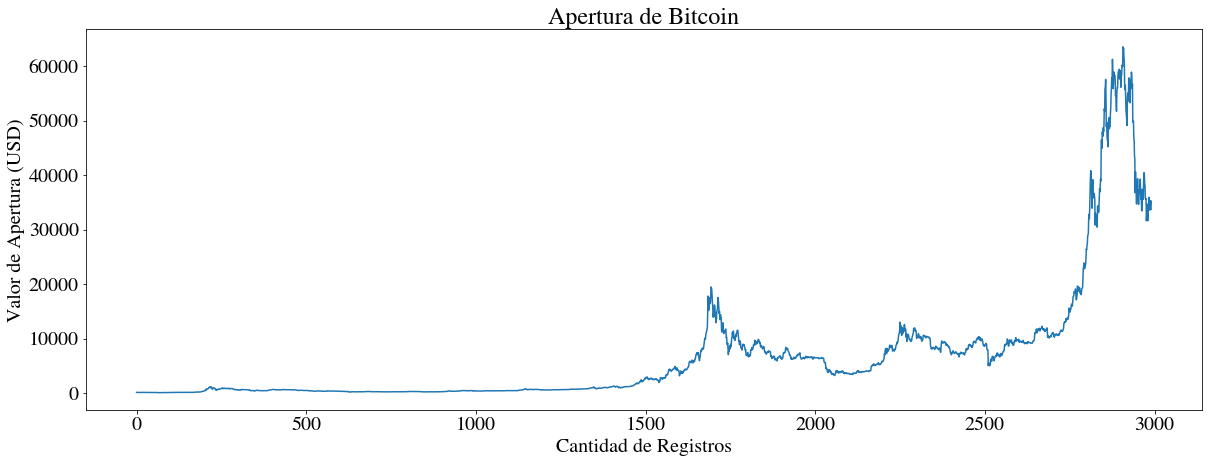

In [ ]:
matplotlib.rcParams.update({'font.size': 20, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
fig = plt.figure(num=30, figsize=(50,20), dpi=None, facecolor="w", edgecolor="w", frameon=True)

bitcoin.Open.plot(figsize=(20,7), title = "Open")
plt.title("Apertura de Bitcoin")
plt.xlabel("Cantidad de Registros")
plt.ylabel("Valor de Apertura (USD)") 

plt.show()

In [ ]:
bitcoin.head(10)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09
5,6,Bitcoin,BTC,2013-05-04 23:59:59,115.000000,92.500000,98.099998,112.500000,0.0,1.250317e+09
6,7,Bitcoin,BTC,2013-05-05 23:59:59,118.800003,107.142998,112.900002,115.910004,0.0,1.288693e+09
7,8,Bitcoin,BTC,2013-05-06 23:59:59,124.663002,106.639999,115.980003,112.300003,0.0,1.249023e+09
8,9,Bitcoin,BTC,2013-05-07 23:59:59,113.444000,97.699997,112.250000,111.500000,0.0,1.240594e+09
9,10,Bitcoin,BTC,2013-05-08 23:59:59,115.779999,109.599998,109.599998,113.566002,0.0,1.264049e+09


In [ ]:
bitcoin.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
mean,1496.000000,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
std,863.571653,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11
min,1.000000,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,748.500000,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09
50%,1496.000000,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10
75%,2243.500000,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


In [ ]:
matplotlib.rcParams.update({'font.size': 20, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
from matplotlib.pyplot import figure

In [ ]:
bitcoin_2017 = bitcoin.copy()
bitcoin_2017 = bitcoin_2017[(bitcoin_2017.Date>= '2017') & (bitcoin_2017.Date < '2018')]
bitcoin_2017.loc[0:,'Date'] = pd.to_datetime(bitcoin_2017.loc[0:,'Date']).values

bitcoin_2018 = bitcoin.copy()
bitcoin_2018 = bitcoin_2018[(bitcoin_2018.Date >= '2018') & (bitcoin_2018.Date < '2019')]
bitcoin_2018['Date'] = pd.to_datetime(bitcoin_2018['Date']).values

bitcoin_2019 = bitcoin.copy()
bitcoin_2019 = bitcoin_2019[(bitcoin_2019.Date >= '2019') & (bitcoin_2019.Date < '2020')]
bitcoin_2019['Date'] = pd.to_datetime(bitcoin_2019['Date']).values

bitcoin_2020 = bitcoin.copy()
bitcoin_2020 = bitcoin_2020[(bitcoin_2020.Date >= '2020') & (bitcoin_2020.Date < '2021')]
bitcoin_2020['Date'] = pd.to_datetime(bitcoin_2020['Date']).values

bitcoin_2021 = bitcoin.copy()
bitcoin_2021 = bitcoin_2021[(bitcoin_2021.Date >= '2021') & (bitcoin_2021.Date < '2022')]
bitcoin_2021['Date'] = pd.to_datetime(bitcoin_2021['Date']).values

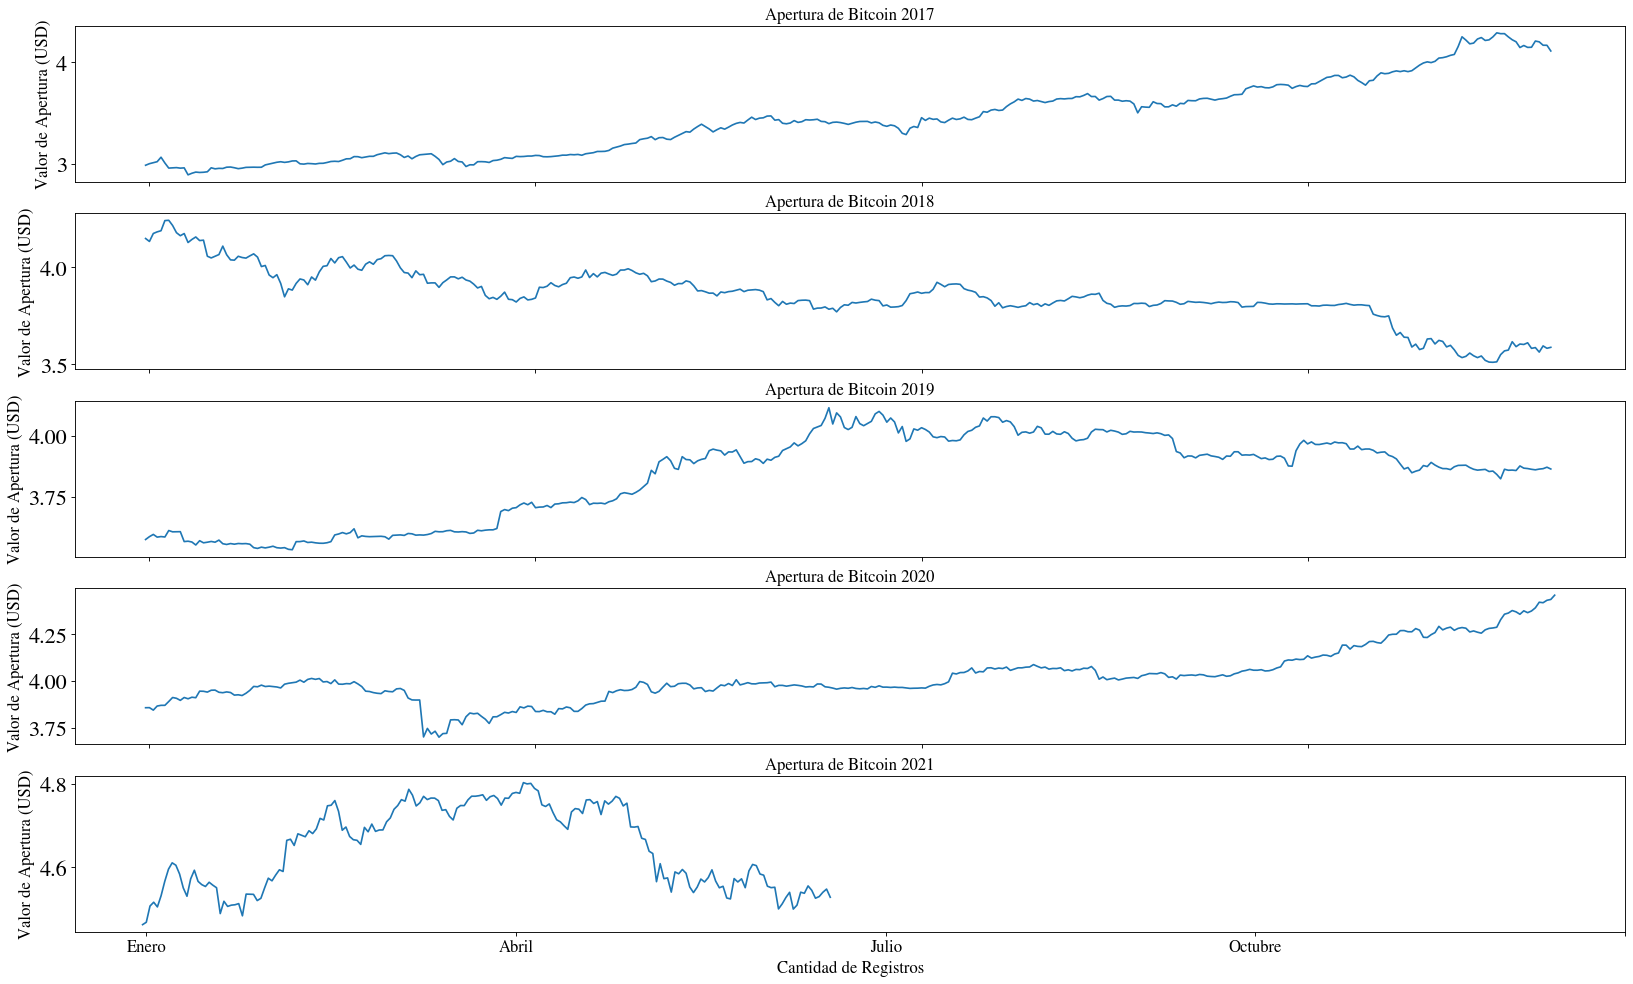

In [ ]:
figure(figsize=(25, 15), dpi=80)
bitcoin_list = {'2017':bitcoin_2017, 
                '2018':bitcoin_2018, 
                '2019':bitcoin_2019, 
                '2020':bitcoin_2020, 
                '2021':bitcoin_2021}
#ax1 = plt.subplot(5,1,1)

for i,key in enumerate(bitcoin_list):
  bitcoin_list[key].Open = bitcoin_list[key].Open.apply(lambda x: np.log10(x))
  if i==0:
    ax1=plt.subplot(5,1,1)
    #ax1 = plt.subplot(5,1,1)
    plt.plot(bitcoin_list[key]['Date'].dt.strftime("%m-%d"), bitcoin_list[key].Open)
    plt.title(f"Apertura de Bitcoin {key}", fontsize=15)
    plt.xlabel("", fontsize=15)
    plt.ylabel("Valor de Apertura (USD)", fontsize=15) 
    plt.xticks(range(1,480,100), ['Enero','Abril','Julio','Octubre'], fontsize=12)
    plt.yticks(fontsize=20)
    #plt.tick_params('both', labelsize=12)
    plt.tick_params('x', labelbottom=False)

  elif i != 4:
    plt.subplot(5,1,i+1, sharex=ax1)
    plt.plot(bitcoin_list[key]['Date'].dt.strftime("%m-%d"), bitcoin_list[key].Open)
    plt.title(f"Apertura de Bitcoin {key}", fontsize=15)
    plt.xlabel("", fontsize=15, )
    plt.ylabel("Valor de Apertura (USD)", fontsize=15) 
    plt.xticks(range(1,480,100), ['Enero','Abril','Julio','Octubre'], fontsize=12)
    plt.yticks(fontsize=20)
    plt.tick_params('x', labelbottom=False)
  else:
    plt.subplot(5,1,i+1, sharex=ax1)
    plt.plot(bitcoin_list[key]['Date'].dt.strftime("%m-%d"), bitcoin_list[key].Open)
    plt.title(f"Apertura de Bitcoin {key}", fontsize=15)
    plt.xlabel("Cantidad de Registros", fontsize=15, )
    plt.ylabel("Valor de Apertura (USD)", fontsize=15) 
    plt.xticks(range(1,480,100), ['Enero','Abril','Julio','Octubre'], fontsize=15)
    plt.yticks(fontsize=20)
    #plt.tick_params('x', labelbottom=False)
plt.show()
##bb_box_inches = ¡tigth

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

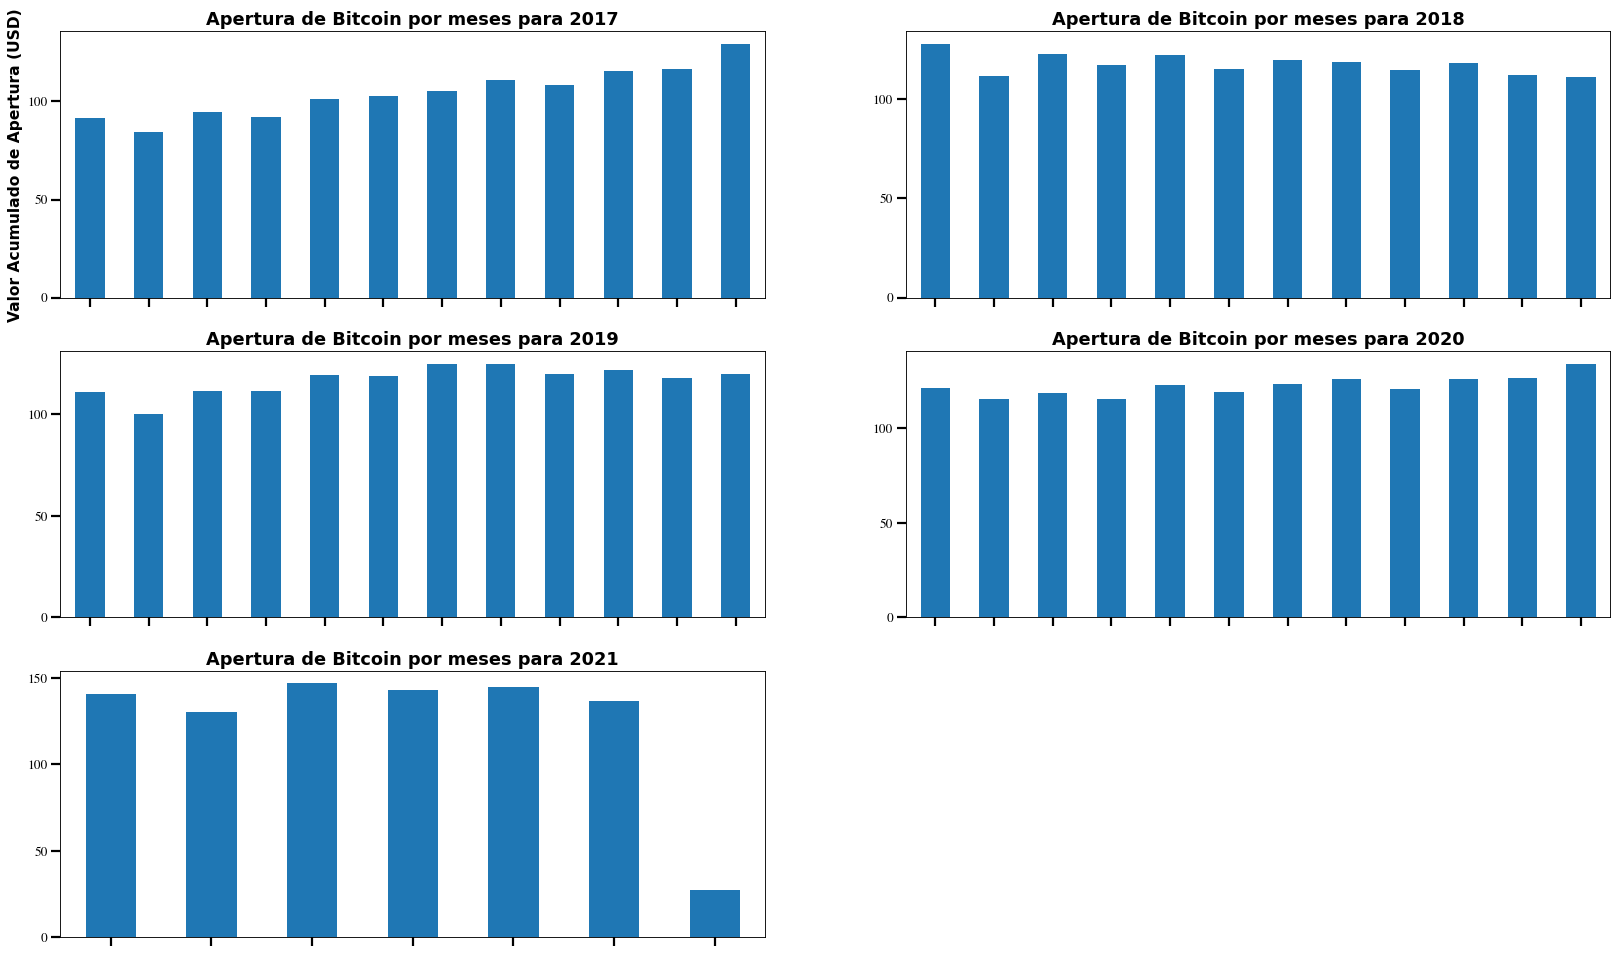

In [ ]:
figure(figsize=(25, 15), dpi=80)

for i,key in enumerate(bitcoin_list):
  if i==0:
    ax1= plt.subplot(3,2,i+1)
    df = bitcoin_list[key][['Date','Open']]
    df['Date'] = pd.to_datetime(df['Date']).values
    df['Date'] = df['Date'].apply(lambda x: x.strftime('%m'))
    tr  = round(df.groupby('Date')['Open'].sum(), 2)
    del df

    tr.plot(kind = 'bar')
    plt.title(f"Apertura de Bitcoin por meses para {key}",  fontdict={'family': 'arial', 
                                                            'color' : 'black',
                                                            'weight': 'bold',
                                                            'size': 16})
    plt.xlabel("", fontsize=12)
    plt.ylabel("Valor Acumulado de Apertura (USD)",  fontdict={'family': 'arial', 
                                                            'color' : 'black',
                                                            'weight': 'bold',
                                                            'size': 14}) 
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tick_params(direction='out', length=8, width=2, colors='black',grid_color='r', grid_alpha=0.5)
    plt.tick_params('x', labelbottom=False)
  else:
    plt.subplot(3,2,i+1)
    df = bitcoin_list[key][['Date','Open']]
    df['Date'] = pd.to_datetime(df['Date']).values
    df['Date'] = df['Date'].apply(lambda x: x.strftime('%m'))
    tr  = round(df.groupby('Date')['Open'].sum(), 2)
    del df

    tr.plot(kind = 'bar')
    plt.title(f"Apertura de Bitcoin por meses para {key}",  fontdict={'family': 'arial', 
                                                            'color' : 'black',
                                                            'weight': 'bold',
                                                            'size': 16})
    plt.xlabel("", fontsize=12)
    
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tick_params(direction='out', length=8, width=2, colors='black',grid_color='r', grid_alpha=0.5)
    plt.tick_params('x', labelbottom=False)

  
plt.savefig("distribucion.jpg")
plt.show()


In [ ]:
df_Coins_open_copy = df_Coins_open.copy()
df_Coins_open_copy.head()

,bitcoinOpen,binanceOpen,cardanoOpen,ethereumOpen,tetherOpen
Date,,,,,
2017-10-02,4395.810059,1.52662,0.024607,302.481995,0.998088
2017-10-03,4408.459961,1.96783,0.025757,297.483002,1.001880
2017-10-04,4319.370117,1.85150,0.020864,292.753998,1.001910
2017-10-05,4229.879883,1.63499,0.021951,292.773010,1.000270
2017-10-06,4324.459961,1.67731,0.021359,295.154999,1.000420


In [ ]:
for i,key in enumerate(df_Coins_open_copy.columns):
  print(i, key[0:-4].upper()) 

0 BITCOIN
1 BINANCE
2 CARDANO
3 ETHEREUM
4 TETHER


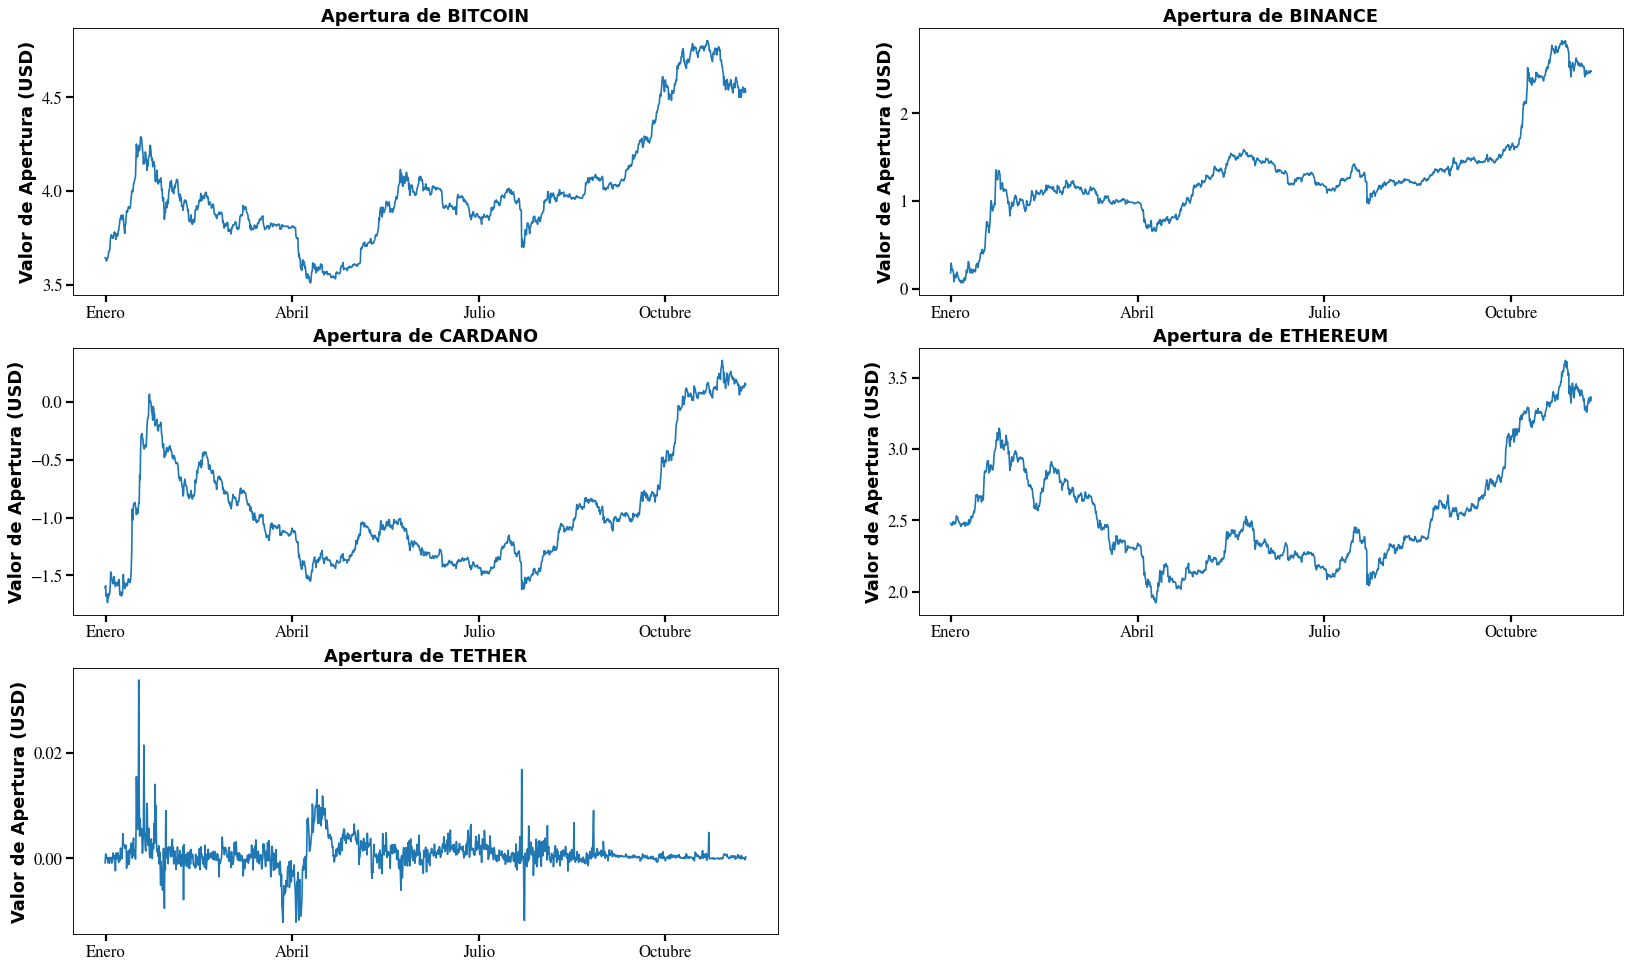

In [ ]:
figure(figsize=(25, 15), dpi=80)

for i,key in enumerate(df_Coins_open_copy.columns):
  df_Coins_open_copy[key] = df_Coins_open_copy[key].apply(lambda x: np.log10(x))
  plt.subplot(3,2,i+1)
  plt.plot(df_Coins_open_copy.index, df_Coins_open_copy[key])
  plt.title(f"Apertura de {key[0:-4].upper()}",  fontdict={'family': 'arial', 
                                                            'color' : 'black',
                                                            'weight': 'bold',
                                                            'size': 16})
  plt.xlabel("", fontsize=10)
  plt.ylabel("Valor de Apertura (USD)",   fontdict={'family': 'arial', 
                                                            'color' : 'black',
                                                            'weight': 'bold',
                                                            'size': 16}) 
  plt.xticks(range(1,1600,400), ['Enero','Abril','Julio','Octubre'], fontsize=15)
  plt.yticks(fontsize=15)
  plt.tick_params(direction='out', length=6, width=2, colors='black',grid_color='r', grid_alpha=0.5)

plt.savefig("tendencias.jpg") #Para que guardamos la figura? para pegarlas en el documento y no pierda calidad.
plt.show()

In [ ]:
df_Coins_open_copy.head()

,bitcoinOpen,binanceOpen,cardanoOpen,ethereumOpen,tetherOpen
Date,,,,,
2017-10-02,3.643039,0.183731,-1.608941,2.480700,-0.000831
2017-10-03,3.644287,0.293988,-1.589111,2.473462,0.000816
2017-10-04,3.635420,0.267524,-1.680600,2.466503,0.000829
2017-10-05,3.626328,0.213515,-1.658540,2.466531,0.000117
2017-10-06,3.635932,0.224613,-1.670421,2.470050,0.000182
